# COMP3314 Assignment1-Q3: Digits Classification (15 Points)

In chapter 3 sample codes, we applied different scikit-learn classifiers for the Iris data set. In this question, we will use the classifiers over another data set: hand-written digits.

Your tasks:

1. Split the dataset into a training set and a test set.
2. Create classifiers from scikit-learn and set their hyper-parameters. The classifiers include:
   * Perceptron
   * Logistic regression
3. Train your classifiers with the training set.
4. Evaluate your classifiers with the test set.
5. Compare the performance of the classifiers. Which classifier(s) perform(s) the best and worst, and why?

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib as mpl

digits = load_digits()

xs = digits.data
ys = digits.target

print(xs.shape)
print(ys.shape)

(1797, 64)
(1797,)


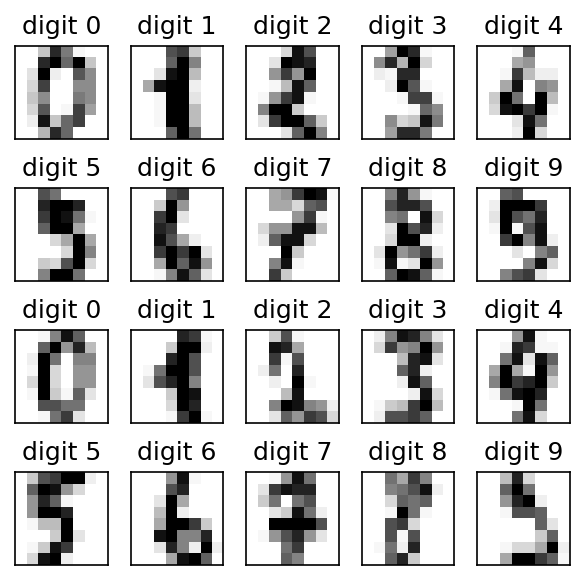

In [2]:
mpl.rcParams["figure.dpi"] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(
    nrows=num_rows, ncols=num_cols, sharex=True, sharey=True, figsize=(4, 4)
)
ax = ax.flatten()

for index in range(num_rows * num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap="Greys", interpolation="nearest")
    ax[index].set_title("digit " + str(label))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Data Preprocessing ( 3 Points )

Hints:
1. Divide training and test data set and apply other techniques we have learned if needed.
2. You may add some common functions here, such as the evaluation code.

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np


def get_accuracy(ys, ys_pred):
    # Your code, implement the code for evaluation
    assert ys.shape == ys_pred.shape
    assert ys.ndim == 1
    return np.sum(ys == ys_pred) / len(ys)


# Your code, split the train/test dataset
xs_train, xs_test, ys_train, ys_test = train_test_split(
    xs, ys, test_size=0.1, stratify=ys
)

## Classifier #1 Perceptron ( 3 Points )

In [4]:
# Example code, including training and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron

# Tune the eta0 hyperparameter.
eat0_list = [0.0001, 0.001, 0.01, 0.1, 1]

# Your code here.
accuracies = []
for eta0 in eat0_list:
    model = Perceptron(max_iter=100, tol=1e-3, eta0=eta0)
    model.fit(xs_train, ys_train)
    ys_pred = model.predict(xs_test)
    accuracy = get_accuracy(ys_test, ys_pred)
    accuracies.append(accuracy)

for eta0, accuracy in zip(eat0_list, accuracies):
    print(f"eta0 = {eta0:.4f}, accuracy = {accuracy:.4f}")

best_accuracy_perceptron = max(accuracies)
best_eta0_perceptron = eat0_list[accuracies.index(best_accuracy_perceptron)]
print(
    f"Best performing Perceptron: eta0 = {best_eta0_perceptron}, accuracy = {best_accuracy_perceptron:.4f}"
)

eta0 = 0.0001, accuracy = 0.9222
eta0 = 0.0010, accuracy = 0.9333
eta0 = 0.0100, accuracy = 0.9278
eta0 = 0.1000, accuracy = 0.9278
eta0 = 1.0000, accuracy = 0.9278
Best performing Perceptron: eta0 = 0.001, accuracy = 0.9333


## Classifier #2 Logistic Regression ( 3 Points )

In [5]:
# Your code, including training and testing, to observe the accuracies.

from sklearn.linear_model import LogisticRegression

# Tune the C hyperparameter.
C_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

accuracies = []
for C in C_list:
    model = LogisticRegression(
        C=C, max_iter=1000, solver="liblinear", multi_class="ovr"
    )
    model.fit(xs_train, ys_train)
    ys_pred = model.predict(xs_test)
    accuracy = get_accuracy(ys_test, ys_pred)
    accuracies.append(accuracy)

for C, accuracy in zip(C_list, accuracies):
    print(f"C = {C:.4f}, accuracy = {accuracy:.4f}")

best_accuracy_lr = max(accuracies)
best_C_lr = C_list[accuracies.index(best_accuracy_lr)]
print(
    f"Best performing Logistic Regression: C = {best_C_lr}, accuracy = {best_accuracy_lr:.4f}"
)

/Users/liheyang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/liheyang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/liheyang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/liheyang/Library/Python/3.9/lib/python/site-package

C = 0.0001, accuracy = 0.9444
C = 0.0010, accuracy = 0.9611
C = 0.0100, accuracy = 0.9778
C = 0.1000, accuracy = 0.9611
C = 1.0000, accuracy = 0.9667
C = 10.0000, accuracy = 0.9556
C = 100.0000, accuracy = 0.9500
Best performing Logistic Regression: C = 0.01, accuracy = 0.9778


## Classifier #3 Choose it by yourself.  ( 3 Points )

You are required to choose another classifer in sklearn and evaluate it your self.  Try to find a better one than the previous two.

In [6]:
# Your code, including training and testing, to observe the accuracies.

from sklearn.svm import SVC

# Tune hyperparameters C and gamma.
C_list = [0.1, 1, 10]
gamma_list = [0.001, 0.01, 0.1, 1]

# Store the best performing model's settings
best_accuracy = 0
best_params = {"C": None, "gamma": None}

accuracies = []

for C in C_list:
    for gamma in gamma_list:
        model = SVC(C=C, gamma=gamma, kernel="rbf")
        model.fit(xs_train, ys_train)
        ys_pred = model.predict(xs_test)
        accuracy = get_accuracy(ys_test, ys_pred)
        accuracies.append((C, gamma, accuracy))

        # Update best model if current model is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params["C"] = C
            best_params["gamma"] = gamma

for C, gamma, accuracy in accuracies:
    print(f"C = {C}, gamma = {gamma}, accuracy = {accuracy:.4f}")

print(
    f"Best performing model: C = {best_params['C']}, gamma = {best_params['gamma']}, accuracy = {best_accuracy:.4f}"
)

C = 0.1, gamma = 0.001, accuracy = 0.9778
C = 0.1, gamma = 0.01, accuracy = 0.1000
C = 0.1, gamma = 0.1, accuracy = 0.1000
C = 0.1, gamma = 1, accuracy = 0.1000
C = 1, gamma = 0.001, accuracy = 0.9889
C = 1, gamma = 0.01, accuracy = 0.8889
C = 1, gamma = 0.1, accuracy = 0.1056
C = 1, gamma = 1, accuracy = 0.1000
C = 10, gamma = 0.001, accuracy = 0.9889
C = 10, gamma = 0.01, accuracy = 0.9000
C = 10, gamma = 0.1, accuracy = 0.1056
C = 10, gamma = 1, accuracy = 0.1000
Best performing model: C = 1, gamma = 0.001, accuracy = 0.9889


## Discussions ( 3 Points )

Compare the performance of the classifiers. Which classifier(s) perform(s) the best and worst, and why?

#### Performance

- The logistic regression model performs better than Perceptron for this dataset.
- The SVM model performs better than logistic regression for this dataset.

#### Insights

The varying performance levels of these classifiers highlight several important considerations in machine learning:

1. Linearity vs. Non-Linearity: The Perceptron's lower performance reinforces the importance of considering the data's linearity. Non-linear models like SVM with RBF kernel can capture complex patterns that linear models cannot.
2. Hyperparameter Tuning: The varying performances across different settings of eta0 for Perceptron, C for Logistic Regression, and C & gamma for SVM underline the critical role of hyperparameter tuning in optimizing model performance.
3. Model Complexity: SVMs, especially with non-linear kernels like RBF, tend to handle more complex decision boundaries better than simpler linear models. However, this comes with increased computational cost and the need for careful hyperparameter tuning to avoid overfitting.
4. Dataset Characteristics: The effectiveness of a classifier is heavily influenced by the characteristics of the dataset. For the handwritten digits dataset, the spatial and structural complexities of the digits make flexible, non-linear models more suitable.